In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
x = boston.data
y = boston.target

C:\Users\jeramirez\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [4]:
ytest = np.array([0,1,2])

In [5]:
ypred = np.array([0.5,.3,2])

In [11]:
def rmse (a,b):
    result = (((a - b)**2).mean())**0.5
    return result

In [12]:
# Fit your model using the training set
reg = KNeighborsRegressor()
reg.fit(X_train, y_train)

# Call predict to get the predicted values for training and test set
train_predicted = reg.predict(X_train)
test_predicted = reg.predict(X_test)

# Calculate RMSE for training and test set
print( 'RMSE for training set ', rmse(y_train, train_predicted) )
print( 'RMSE for test set ', rmse(y_test, test_predicted) )

RMSE for training set  4.999937097229654
RMSE for test set  6.908140581894132


In [14]:
mean_squared_error(y_train,train_predicted)

24.9993709762533

In [15]:
mean_squared_error(y_test,test_predicted)

47.7224062992126

In [16]:
def cross_val(a,b,folds, k):
    kf = KFold(n_splits=folds)
    knn = KNeighborsRegressor(n_neighbors=k)
    temp = np.zeros(folds)
    temp2 = np.zeros(folds)
    for j, (train_index, val_index) in enumerate(kf.split(a)):
        X_tr = a[train_index]
        y_tr = b[train_index]
        X_vl = a[val_index]
        y_vl = b[val_index]

        y_pred = knn.fit(X_tr, y_tr).predict(X_vl)
        temp[j] = rmse(y_pred, y_vl)
        y_pred2 = knn.fit(X_tr, y_tr).predict(X_tr)
        temp2[j] = rmse(y_pred2, y_tr)
        #temp2[j] = mean_squared_error(y_pred, y_vl)
    return temp.mean(), temp2.mean()

In [17]:
neighbors = np.array(range(1,101))
prediccion = np.zeros(100)
training = np.zeros(100)

In [18]:
for i,j in enumerate(neighbors):
    prediccion[i],training[i] = cross_val(X_train, y_train, 5, j)

Text(0.5, 0.98, 'Bias vs Variance')

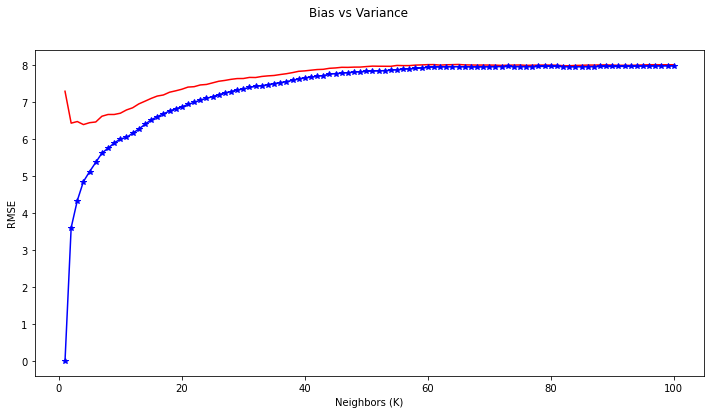

In [21]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(neighbors, prediccion, color='red')
ax.plot(neighbors, training, color='blue',marker='*')
ax.set_xlabel('Neighbors (K)')
ax.set_ylabel('RMSE')
fig.suptitle('Bias vs Variance')